# Assignment 3

Answers to questions are at the bottom. The following code is used to explore features and preprocess data. Comments describe what is being done and why. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns ; sns.set(style = "ticks", color_codes = True)
import pandas as pd
from IPython.display import display

#had to add the thousands argument for gdp per year to be int 
df = pd.read_csv('./Datasets/SuicideRatesOverview/master.csv', thousands=',')

#checking integrity of df
print(df.dtypes)
display(df)


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


In [2]:
#copying original data before modifying and exploring further
df2 = df.copy()

#country-year is redundant with country and year features so it is dropped
df2.drop(columns=['country-year'], inplace=True)
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers


In [3]:
#checking for NaNs
print(df2.isnull().any())

display(df2.loc[df2['HDI for year'].isnull()])

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool


,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27755,Uzbekistan,2009,female,75+ years,7,318983,2.19,NaN,33689223673,1332,Silent
27756,Uzbekistan,2009,female,35-54 years,65,3263931,1.99,NaN,33689223673,1332,Boomers
27757,Uzbekistan,2009,female,55-74 years,15,1105076,1.36,NaN,33689223673,1332,Silent
27758,Uzbekistan,2009,male,5-14 years,37,2805898,1.32,NaN,33689223673,1332,Generation Z


In [4]:
#Majority of records don't have HDI for year, so dropping column
df2.drop(columns=['HDI for year'], inplace=True)
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [5]:
#Checking for duplicates
df2['duplicated'] = df2.duplicated()
display(df2.loc[df2['duplicated']==True])

#no duplicates found so the added column is dropped
df2.drop(columns='duplicated', inplace=True)
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,duplicated


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [6]:
#Obtaining information about data distribution for columns with numerical data
df2.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [7]:
#creating a classification for suicide rate based on me value above 
#because mean is skewed by potential outliers like the value 224.97
#high rate is 2, medium rate is 1, and low rate is 0
#high is 5.99 and greater, medium is from .92 to 5.99, and low is 0 to .92
rateVals = []
for x in df2['suicides/100k pop']:
    if x >= 5.99: 
        rateVals.append(2)
    elif x >= .92:
        rateVals.append(1)
    else:
        rateVals.append(0)
        
df2['suicide rate'] = rateVals

#Checking encoding around quartiles for anomalies
display(df2.loc[df2['suicides/100k pop'] >= 5.99])
display(df2.loc[df2['suicides/100k pop'] >= .92])
display(df2.loc[df2['suicides/100k pop'] < .92])

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,suicide rate
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,2
24,Albania,1989,male,75+ years,2,22500,8.89,2335124988,833,G.I. Generation,2
25,Albania,1989,male,25-34 years,18,283600,6.35,2335124988,833,Boomers,2
48,Albania,1993,male,15-24 years,18,243300,7.40,1228071038,437,Generation X,2
60,Albania,1994,male,75+ years,2,24600,8.13,1985673798,697,G.I. Generation,2
...,...,...,...,...,...,...,...,...,...,...,...
27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,63067077179,2309,Millenials,2
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,63067077179,2309,Millenials,2
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,63067077179,2309,Boomers,2
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,63067077179,2309,Millenials,2


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,suicide rate
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,2
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent,1
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X,1
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation,1
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers,1
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X,1
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent,1
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z,1
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z,1


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,suicide rate
8,Albania,1987,male,55-74 years,1,137500,0.73,2156624900,796,G.I. Generation,0
9,Albania,1987,female,5-14 years,0,311000,0.00,2156624900,796,Generation X,0
10,Albania,1987,female,55-74 years,0,144600,0.00,2156624900,796,G.I. Generation,0
11,Albania,1987,male,5-14 years,0,338200,0.00,2156624900,796,Generation X,0
22,Albania,1988,female,5-14 years,0,317200,0.00,2126000000,769,Generation X,0
...,...,...,...,...,...,...,...,...,...,...,...
27723,Uzbekistan,2003,female,5-14 years,11,3085543,0.36,10128112401,441,Millenials,0
27735,Uzbekistan,2004,female,5-14 years,4,3031913,0.13,12030023548,516,Millenials,0
27747,Uzbekistan,2005,female,5-14 years,10,2970748,0.34,14307509839,606,Millenials,0
27759,Uzbekistan,2009,female,5-14 years,18,2678474,0.67,33689223673,1332,Generation Z,0


In [8]:
#checking possible nominal values
for label in df2.columns:
    if df2[label].dtype == object: 
        print(f'{label} ', df2[label].unique())
        
#preparing values for histogram plotting
df3 = pd.DataFrame({'country': df2['country'].values,
                    'suicides/100k pop': df2['suicides/100k pop'].values})
display(df3)

country  ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'

,country,suicides/100k pop
0,Albania,6.71
1,Albania,5.19
2,Albania,4.83
3,Albania,4.59
4,Albania,3.28
...,...,...
27815,Uzbekistan,2.96
27816,Uzbekistan,2.58
27817,Uzbekistan,2.17
27818,Uzbekistan,1.67


In [9]:
#%%time
#Attempt 1: Graphing suicides/100k pop histogram for every country using seaborn
#Takes a long time and not easy to view. There is likelky a better way to do this using this library
#sns.displot(data = df3, x = 'suicides/100k pop', row = 'country', binwidth = 5)

In [10]:
#%%time
#Attempt 2: Graphing suicides/100k pop histogram for every country using matplotlib
#faster and better visually than attempt 1. Still pretty slow though

#fig, axs = plt.subplots(11, 10, sharex = True, sharey = True, figsize=(30,10))
#fig.tight_layout()
#fig.supxlabel('Suicides/100k Pop')
#fig.supylabel('Count')

#Plotting suicide/100k pop histogram for each country
#count=0
#for row in range(11):
#    for col in range(10):
#        if count < len( df3['country'].unique() ):
#            axs[row,col].hist(
#                x = df3['suicides/100k pop'].loc[df3['country'] == df3['country'].unique()[count] ].values,
#                bins = 10)
#            axs[row,col].set_title(df3['country'].unique()[count], fontsize = 'small')
#            count += 1
#        else:
#            axs[row,col].axis('off')

Wall time: 2.6 s


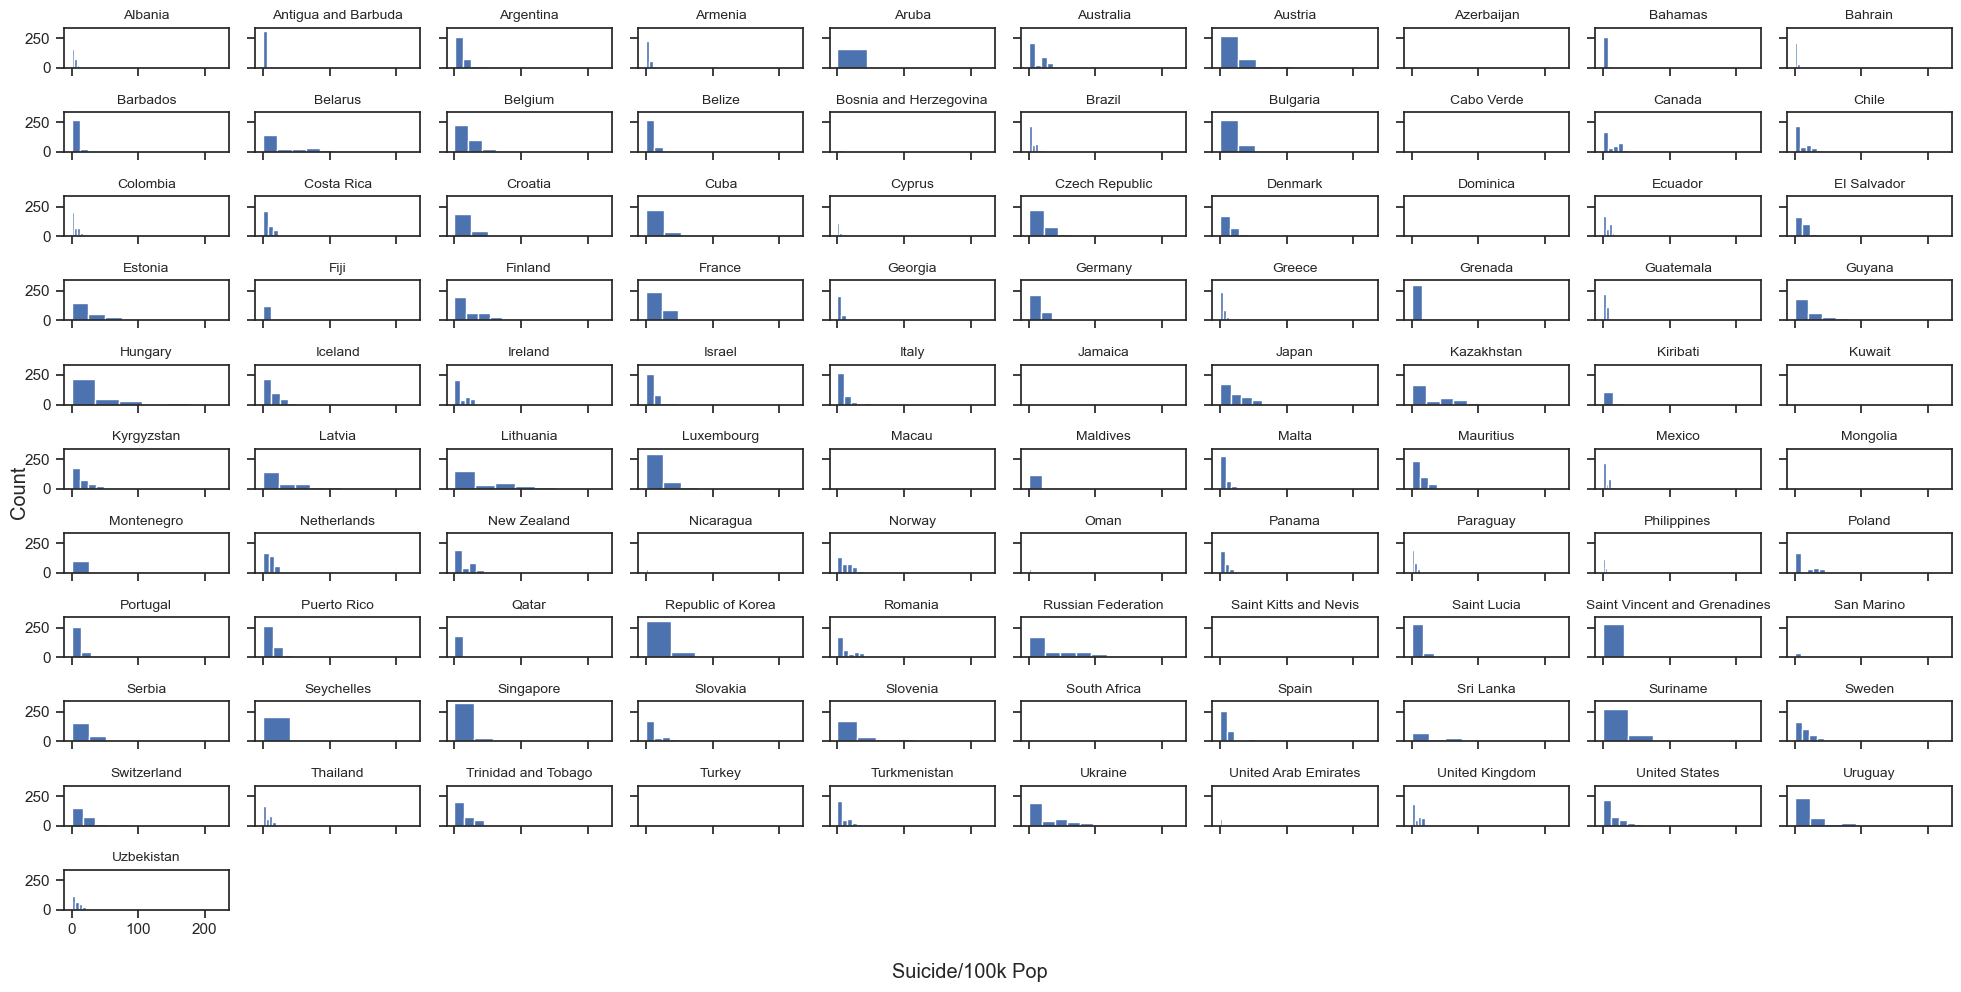

In [11]:
%%time

#Attempt 3: Using .flat attribute seen in https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html
#Still takes a while but it has the best performance of the 3 attempts
fig, axs = plt.subplots(11, 10, figsize = (20, 10), tight_layout = True, sharex = True, sharey = True)
fig.supxlabel('Suicide/100k Pop')
fig.supylabel('Count')

for num, ax in enumerate(axs.flat):
    if num < len( df3['country'].unique() ):
            ax.hist(
                x = df3['suicides/100k pop'].loc[df3['country'] == df3['country'].unique()[num] ].values,
                bins = 5)
            ax.set_title(df3['country'].unique()[num], fontsize = 'small')
    else:
            ax.axis('off')

In [12]:
#One hot encoding countries, sex, age, generation
df2 = pd.get_dummies(data = df2, columns = [col for col in df2.columns if (col != 'suicide rate' and df2[col].dtype == object)], drop_first=True)
display(df2)

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),suicide rate,country_Antigua and Barbuda,country_Argentina,country_Armenia,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,2156624900,796,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,2156624900,796,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,2156624900,796,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,2156624900,796,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,9,274300,3.28,2156624900,796,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,3620833,2.96,63067077179,2309,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
27816,2014,9,348465,2.58,63067077179,2309,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,2014,60,2762158,2.17,63067077179,2309,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27818,2014,44,2631600,1.67,63067077179,2309,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [13]:
#I suspect suicide_no, population, and suicides/100k pop will cause issues in the model
#because suicides/100k pop is derived from suicide_no and population, 
#so suicide_no and suicides/100k pop will be dropped and new df will result

dfTrim = df2.drop(columns=['suicides_no', 'suicides/100k pop'])
display(dfTrim)

,year,population,gdp_for_year ($),gdp_per_capita ($),suicide rate,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,312900,2156624900,796,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,308000,2156624900,796,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1987,289700,2156624900,796,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,21800,2156624900,796,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,274300,2156624900,796,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,3620833,63067077179,2309,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
27816,2014,348465,63067077179,2309,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,2014,2762158,63067077179,2309,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27818,2014,2631600,63067077179,2309,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [14]:
from sklearn.preprocessing import MinMaxScaler


#Now I want to separate dependent variable and normalize x values
y = pd.DataFrame(dfTrim['suicide rate'].values, columns=['suicide rate'])
dfTrim = dfTrim.drop(columns='suicide rate')
display(dfTrim)

mms = MinMaxScaler()
dfTrimNorm = pd.DataFrame(mms.fit_transform(dfTrim.values), columns=dfTrim.columns)
display(dfTrimNorm)

,year,population,gdp_for_year ($),gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,312900,2156624900,796,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,308000,2156624900,796,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1987,289700,2156624900,796,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,21800,2156624900,796,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,274300,2156624900,796,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,3620833,63067077179,2309,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
27816,2014,348465,63067077179,2309,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,2014,2762158,63067077179,2309,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27818,2014,2631600,63067077179,2309,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


,year,population,gdp_for_year ($),gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0.064516,0.007137,0.000116,0.004322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.064516,0.007025,0.000116,0.004322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.064516,0.006607,0.000116,0.004322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.064516,0.000491,0.000116,0.004322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.064516,0.006256,0.000116,0.004322,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0.935484,0.082652,0.003478,0.016320,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27816,0.935484,0.007949,0.003478,0.016320,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
27817,0.935484,0.063050,0.003478,0.016320,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27818,0.935484,0.060069,0.003478,0.016320,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
from sklearn.model_selection import train_test_split

#preparing datasets for classification
X_train, X_test, Y_train, Y_test = train_test_split(dfTrimNorm, y, test_size=.2, stratify=y)

Data is now ready for classification. I will use an SVM model for classification because the dataset is not too large and it should perform better on the standardized values. 

## Question 1

The most important information would be to predict the rate of suicides expected in a population in order to prevent them. This may be possible if the right independent variables are used to train a model.

## Question 2

Given that we have the rates of suicide per 100k people for each record, we should use a supervised approach to train a model. I think that either regression or classification would be appropriate because the feature 'suicides/100K pop' is originally a floating point value and may be encoded into nominal classifications or left as-is for regression models.

## Question 3

I believe the dependent variable should be the derived feature 'suicide rate' because it gives a nominal classification representing the main learning objective of this dataset, how high the suicide rate will be. The feature 'suicides_no' is another potential dependent variable and could be used in another trial. 

## Question 4

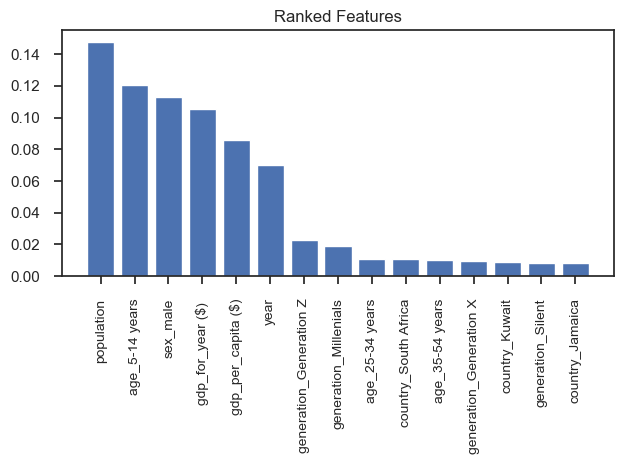

In [16]:
from sklearn.ensemble import RandomForestClassifier

#The general methodology used comes from Chapter 4, pg 141 of our textbook

#creating the forest, n estimators is only 200 because the computer I'm using isn't too powerful
forest = RandomForestClassifier(n_estimators=200)

#trains random forest
forest.fit(X_train, Y_train.values.ravel())

#gathers importance of each feature in an array
featImportance = forest.feature_importances_

#returns an array of indices that sort the featImportance array in descending order
#[::-1] reverses the order of the array to make it in descending order
sortedIndices = np.argsort(featImportance)[::-1]

plt.title("Ranked Features")

#plots importances from the featImportance array from greatest to least
plt.bar(x = range( len(dfTrimNorm.columns[:15]) ), height = featImportance[sortedIndices[:15]], align='center')
plt.tick_params(pad = 10)
plt.xticks(range( len(dfTrimNorm.columns[:15]) ), dfTrimNorm.columns[sortedIndices[:15]], rotation = 90, fontsize = 'small')
plt.tight_layout()
plt.show()

The most important features for classification are shown in the bar graph above. This was done after variables were one hot encoded, so only the top 15 features are shown. The fact that population is the highest ranked is concerning because the dependent variable is derived using population, so the inclusion of population may bias the model.

## Question 5

The code before the questions was to explore the data, feature scale, reduce features, one hot encode nominal variables, and normalize the data. I expected the feature 'HDI for year' to be important when I first saw the dataset, but there are 19,456 NaN values for it out of the 27,820 total samples, so imputing those values seems like it would introduce bias. Unfortunately, this may reduce the complexity of the model and reduce performance too. The list of independent variables used is year, country, age, generation, gdp for year, and gdp per capita. Population will be excluded from the final model because the target value was derived from it. 

## Question 6

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#Starting from a partially processed df2
display(df2)

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),suicide rate,country_Antigua and Barbuda,country_Argentina,country_Armenia,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,2156624900,796,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,2156624900,796,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,2156624900,796,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,2156624900,796,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,9,274300,3.28,2156624900,796,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,3620833,2.96,63067077179,2309,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
27816,2014,9,348465,2.58,63067077179,2309,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,2014,60,2762158,2.17,63067077179,2309,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27818,2014,44,2631600,1.67,63067077179,2309,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [18]:
#Features suicides_no, population, and suicides/100k pop must be dropped
df2.drop(columns=['suicides_no', 'population', 'suicides/100k pop'], inplace=True)

#Need to remove target from other features
targets = pd.DataFrame(df2['suicide rate'].values, columns=['suicide rate'])
X = df2.drop(columns=['suicide rate'])

display(targets)
display(X)

,suicide rate
0,2
1,1
2,1
3,1
4,1
...,...
27815,1
27816,1
27817,1
27818,1


,year,gdp_for_year ($),gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,2156624900,796,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,2156624900,796,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1987,2156624900,796,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,2156624900,796,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,2156624900,796,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,63067077179,2309,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
27816,2014,63067077179,2309,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
27817,2014,63067077179,2309,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27818,2014,63067077179,2309,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, targets, test_size=.2, stratify = targets)

#Now making a pipeline to standardize the data and create an SVM model which is 5-fold validated
svmPipe = make_pipeline(MinMaxScaler(), SVC())

In [20]:
#Cross validation using the pipeline, 5 rounds of cross val, 2 jobs splits up the work between 2 CPUs
svcScores = cross_val_score(estimator = svmPipe, X = X_train, y = Y_train.values.ravel(), cv = 5, n_jobs = 2)

print('Cross validation accuracy: %.3f +/- %.3f' % (svcScores.mean(), svcScores.std()))

Cross validation accuracy: 0.864 +/- 0.003


In [ ]:
svmPipe.fit(X_train, Y_train.values.ravel())

#Testing the model and giving accuracy
acc = svmPipe.score(X_test, Y_test.values.ravel())
print('Model Accuracy: %.3f' %acc)

The cross validated training and testing results are relatively similar and an accuracy of 86-87% is decent. The model was created to estimate the rate of suicides for a datapoint though, so it should undergo more trials to modify hyperparameters for the SVM, test different models, and try different feature compositions. I had to limit the cross validation to 5-fold due to system limitations. 10-fold validation took far too long for me to run multiple times and troubleshoot. 

# References

1) Module 2 class notebook

2) Module 3 class notebook

3) https://pandas.pydata.org/pandas-docs/stable/index.html

4) https://seaborn.pydata.org/index.html

5) https://matplotlib.org/stable/index.html

6) https://numpy.org/doc/stable/index.html